<h1>
Week 1
</h1>

<h2>
Task 1: Estimating Integrals
</h2>

<h3>
The goal in this notebook is to get comfortable with using finite difference methods to perform integration
</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['text.usetex'] = True

<p style="font-size:20px;">
This notebook will reverse the logic from the previous one. Here we will have a function which we wish to integrate. Another way of thinking this is that we know the derivative, and want to find the function itself.
</p>

<p style="font-size:20px;">
While we may think of areas under curves when hearing integration, keep in mind that we will be studying dynamical physical systems. Recall that the position of a particle is the area under its velocity curbe (provided some starting position), and similarly the velocity is achieved from the area under the acceleration curve.
</p>

<p style="font-size:20px;">
In essence most of physics is wrapped up in this -- we want to understand how a system evolves provided a starting situation, some boundary conditions, and a (usually second order) differential equation.
</p>

<p style="font-size:20px;">
One possible approximate finite difference formula is the following
$$
    \frac{{\rm d}f}{{\rm d}x} = f'(x) \approx \frac{f(x+\delta x) - f(x)}{\delta x}.
    \implies
    f(x+\delta x) = f(x) + f'(x)\delta x.
$$
e.g. where will your particle be in a small time step? Where is it now added with some small shift. That shift is the current velocity times the small time difference. We are assumuing however the velocity stays constant over that small time interval.
</p>

In [2]:
def func(x):
    return np.cos(x)

def known_integral(x):
    return np.sin(x)

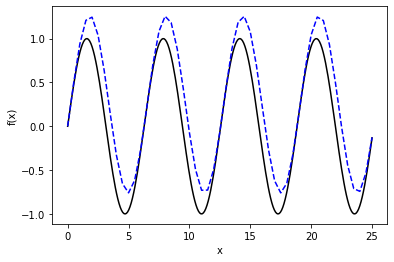

<Figure size 432x288 with 0 Axes>

In [3]:
dx = 0.5

x_vals, integral_vals = [0,], [0,]
while (x_vals[-1] < 25):
    new_x = x_vals[-1] + dx
    integral = integral_vals[-1] + func(x_vals[-1])*dx
    
    x_vals.append(new_x)
    integral_vals.append(integral)

# Make a dense version of the integrated x values for a smooth plot
x_dense = np.linspace(np.min(x_vals), np.max(x_vals), 250)
    
# Plot the data
fig, ax = plt.subplots()
ax.set(xlabel="x", ylabel="f(x)")

ax.plot(x_dense, known_integral(x_dense), color="black", label="Analytic integral")
ax.plot(x_vals, integral_vals, color="blue", linestyle="--", label="Approximate integral")

plt.show()
plt.clf()

<p style="font-size:20px;">
It turns out we can do a much better job without any more function evaluations. Let's repeat the above taylor expansion to second order:
    $$
    f(x+\delta x) \approx f(x) + f'(x)\delta x + f''(x)\frac{\delta x^2}{2}.
    $$
A problem arises here that we (in principle) don't know how to take a derivative of the function we're integrating. However, this is calculus, and we can assume that the function we're integrating is also smooth:
    $$
    f''(x) \equiv g'(x) \approx \frac{g(x+\delta x) - g(x)}{\delta x} = \frac{f'(x+\delta x) - f'(x)}{\delta x}.
    $$
If we add this back into the previous expression:
    $$
    f(x+\delta x) \approx f(x) + f'(x)\delta x + \frac{f'(x+\delta x) - f'(x)}{\delta x}\frac{\delta x^2}{2} \\
                = f(x) + \big(f'(x+\delta x) + f'(x)\big)\frac{\delta x}{2}.
    $$
This is known as the trapezoidal rule.
</p>

<p style="font-size:20px;color:Blue;">
Use this new definition to repeat the above tasks.
</p>

<p style="font-size:20px;">
We can still do slightly better. See how in the final expression we have $(f'(x+\delta x) + f'(x))/2$. We can interpret that as the average gradient over the step. However, if the function is smooth we expect that to be the gradient at the midpoint. This intuition is confirmed by noticing.
    $$
    f'\big(x+\frac{\delta x}{2}\big) \equiv g\big(x+\frac{\delta x}{2}\big) \approx g(x) + g'(x)\frac{\delta x}{2} = f'(x) + f''(x)\frac{\delta x}{2}.
    $$
Using this we finally write
    $$
    f(x+\delta x) \approx f(x) + f'\big(x+\frac{\delta x}{2}\big)\delta x
    $$
</p>

<p style="font-size:20px;color:Blue;">
Use this new definition to repeat the above tasks.
</p>